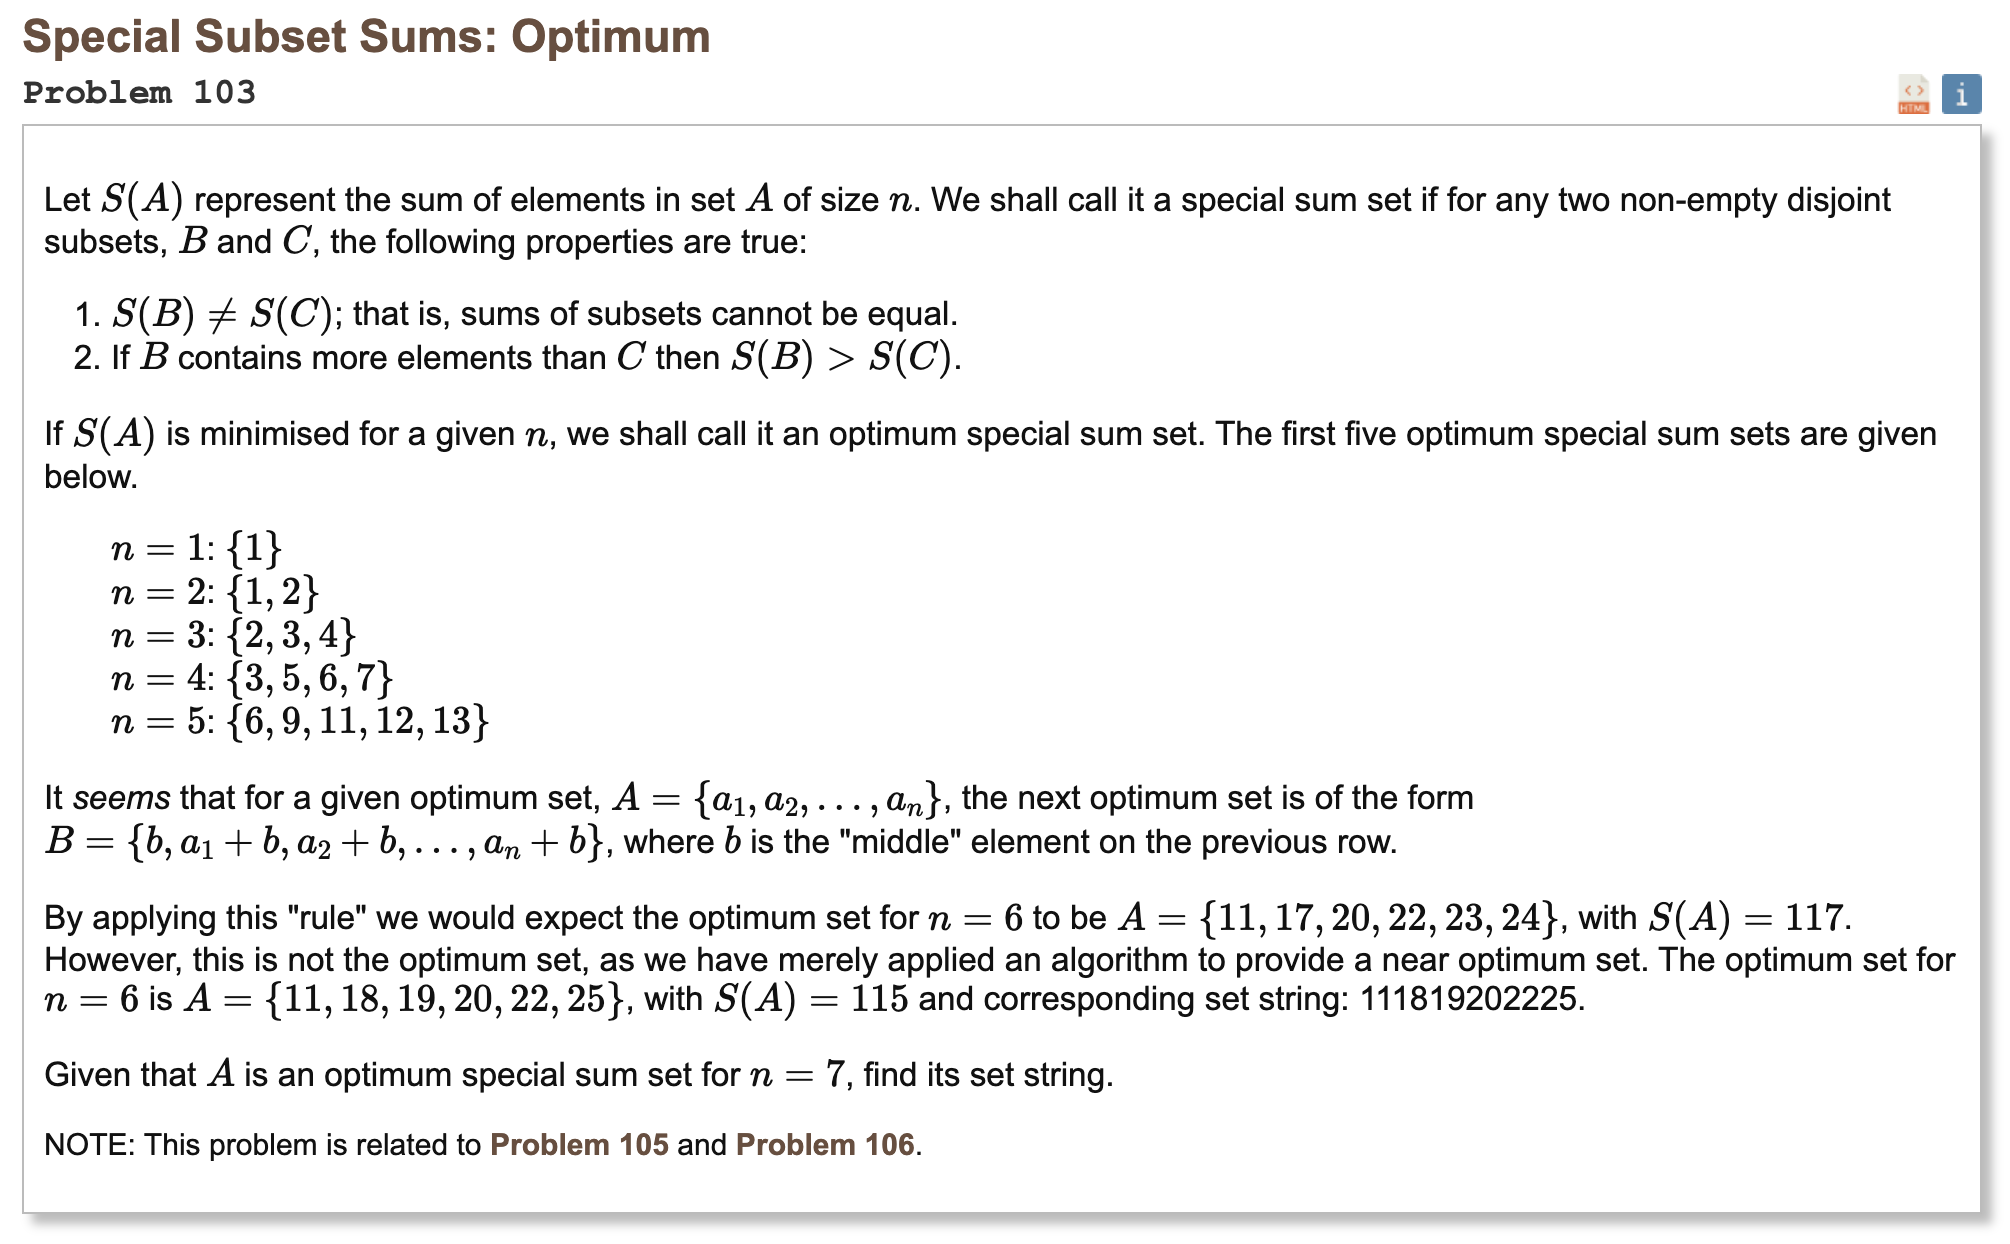

## Initial approach

* write the two rules for sum sets
* start with the best set for n=6
* make a guess for n=7 using middle element method
* change numbers to try smaller total sum
* check all subsets to see if both rules are true
* keep the set with the smallest sum that passes the rules

* define function to check if smaller subsets always have a smaller sun than larger subset
* define function to check disjoint subsets never have the same sum
* define function to check if the set follows all special sum set rules

In [1]:
from itertools import combinations

def quick_rule_two(s):
    s = sorted(s)
    n = len(s)
    for k in range(1, n // 2 + 1):
        if sum(s[:k+1]) <= sum(s[-k:]):
            return False
    return True

def rule_one_disjoint_unique(s):
    n = len(s)
    idx = list(range(n))
    sums_by_size = {}
    for r in range(1, n + 1):
        sums_by_size[r] = {}
        for comb in combinations(idx, r):
            total = sum(s[i] for i in comb)
            if total not in sums_by_size[r]:
                sums_by_size[r][total] = [set(comb)]
            else:
                for prev in sums_by_size[r][total]:
                    if prev.isdisjoint(comb):
                        return False
                sums_by_size[r][total].append(set(comb))
    return True

def is_special_sum_set(s):
    if len(s) != len(set(s)):
        return False
    if not quick_rule_two(s):
        return False
    return rule_one_disjoint_unique(s)

def set_string(s):
    return "".join(str(x) for x in s)

In [2]:
%%time

base6 = [11, 18, 19, 20, 22, 25]
b = base6[len(base6)//2]
seed7 = sorted([b] + [x + b for x in base6])

best = seed7[:]
best_sum = sum(best)
improved = True

while improved:
    improved = False
    for i in range(len(best)):
        original = best[i]
        for v in range(original - 3, original + 4):
            cand = best[:]
            cand[i] = v
            cand = sorted(cand)
            if any(cand[j] <= 0 or cand[j] == cand[j-1] for j in range(1, len(cand))):
                continue
            s = sum(cand)
            if s >= best_sum:
                continue
            if is_special_sum_set(cand):
                best = cand
                best_sum = s
                improved = True

print(best)
print(best_sum)
print("Result:", set_string(best))

[20, 31, 38, 39, 40, 42, 45]
255
Result: 20313839404245
CPU times: user 546 μs, sys: 49 μs, total: 595 μs
Wall time: 570 μs
